## 🧱 Milieuschutz Analysis directly from the Berlin Geoportal WFS (Web Feature Service) — Phase 1: Data Download & Loading

Welcome to the **house-level analysis notebook**. In this phase, we begin from scratch by downloading the **official GeoJSON files** for Berlin’s Milieuschutz zones directly from the Berlin Geoportal WFS service.

---

### 🎯 Mission Objectives

- 🌐 **Download fresh GeoJSONs** from the WFS API:
  - `milieuschutz_residential_protection.geojson`  
    → *Erhaltung der Zusammensetzung der Wohnbevölkerung* (EM)

  - `milieuschutz_urban_character_preservation.geojson`  
    → *Erhaltung der städtebaulichen Eigenart* (ES)

- 💾 Save the files locally using clear English names, ready for analysis

- 🧭 Check and (if needed) assign CRS: `EPSG:25833` (Berlin UTM projection)

- 🧪 Preview structure, geometry, and metadata

- 🔧 Prepare both GeoDataFrames for spatial filtering with **OSM buildings and addresses**


In [11]:
import geopandas as gpd
import os

# 📂 Target download directory
download_dir = "/Users/zeal.v/Help/layered-populate-data-pool-da/milieuschutz/sources"
os.makedirs(download_dir, exist_ok=True)

# 🌐 Berlin WFS layers and filenames
layers = {
    "erhaltgeb_em": "milieuschutz_WFS_residential_protection_origin.geojson",
    "erhaltgeb_es": "milieuschutz_WFS_urban_character_preservation_origin.geojson"
}

# 🔽 Download and save each layer
for layer_name, filename in layers.items():
    url = f"https://gdi.berlin.de/services/wfs/erhaltungsverordnungsgebiete?service=WFS&version=2.0.0&request=GetFeature&typeNames=erhaltungsverordnungsgebiete:{layer_name}&outputFormat=application/json"
    gdf = gpd.read_file(url)
    filepath = os.path.join(download_dir, filename)
    gdf.to_file(filepath, driver="GeoJSON")
    print(f"✅ Downloaded {len(gdf)} features from {layer_name} → saved to {filepath}")

✅ Downloaded 81 features from erhaltgeb_em → saved to /Users/zeal.v/Help/layered-populate-data-pool-da/milieuschutz/sources/milieuschutz_WFS_residential_protection_origin.geojson
✅ Downloaded 94 features from erhaltgeb_es → saved to /Users/zeal.v/Help/layered-populate-data-pool-da/milieuschutz/sources/milieuschutz_WFS_urban_character_preservation_origin.geojson


In [12]:
import os
import geopandas as gpd

# 📂 Load from your custom download directory
base_path = "/Users/zeal.v/Help/layered-populate-data-pool-da/milieuschutz/sources"

gdf_em = gpd.read_file(os.path.join(base_path, "milieuschutz_WFS_residential_protection_origin.geojson"))
gdf_es = gpd.read_file(os.path.join(base_path, "milieuschutz_WFS_urban_character_preservation_origin.geojson"))

# 🧭 Assign CRS if not present
if gdf_em.crs is None:
    gdf_em.set_crs(epsg=25833, inplace=True)
if gdf_es.crs is None:
    gdf_es.set_crs(epsg=25833, inplace=True)

# 📊 Summary of datasets
print("✅ Residential Protection Zones (EM):", len(gdf_em))
print("✅ Urban Character Preservation Zones (ES):", len(gdf_es))
print("\nCRS EM:", gdf_em.crs)
print("CRS ES:", gdf_es.crs)
print("\nColumns EM:", gdf_em.columns.tolist())
print("Columns ES:", gdf_es.columns.tolist())

# 👀 Preview both datasets
print("\n🔍 Preview of Residential Protection Zones (EM):")
display(gdf_em.head())

print("\n🔍 Preview of Urban Character Preservation Zones (ES):")
display(gdf_es.head())

✅ Residential Protection Zones (EM): 81
✅ Urban Character Preservation Zones (ES): 94

CRS EM: EPSG:25833
CRS ES: EPSG:25833

Columns EM: ['id', 'schluessel', 'pdf_link', 'bezirk', 'gebietsname', 'f_gvbl_dat', 'f_in_kraft', 'ae_gvbldat', 'ae_inkraft', 'fl_in_ha', 'geometry']
Columns ES: ['id', 'schluessel', 'bezirk', 'gebietsname', 'f_gvbl_dat', 'f_in_kraft', 'ae_gvbldat', 'ae_inkraft', 'fl_in_ha', 'geometry']

🔍 Preview of Residential Protection Zones (EM):


,id,schluessel,pdf_link,bezirk,gebietsname,f_gvbl_dat,f_in_kraft,ae_gvbldat,ae_inkraft,fl_in_ha,geometry
0,erhaltgeb_em.EM0105,EM0105,https://www.berlin.de/sen/stadtentwicklung/_as...,Mitte,Sparrplatz,24.05.2016,25.05.2016,None,None,51.3,"MULTIPOLYGON (((387899.249 5822422.62, 388017...."
1,erhaltgeb_em.EM0106,EM0106,https://www.berlin.de/sen/stadtentwicklung/_as...,Mitte,Leopoldplatz,24.05.2016,25.05.2016,None,None,62.1,"MULTIPOLYGON (((388298.483 5823527.948, 388394..."
2,erhaltgeb_em.EM0107,EM0107,https://www.berlin.de/sen/stadtentwicklung/_as...,Mitte,Waldstraße,24.05.2016,25.05.2016,None,None,72.6,"MULTIPOLYGON (((386372.618 5821081.272, 386375..."
3,erhaltgeb_em.EM0108,EM0108,https://www.berlin.de/sen/stadtentwicklung/_as...,Mitte,Birkenstraße,24.05.2016,25.05.2016,None,None,81.6,"MULTIPOLYGON (((387389.91 5820897.707, 387465...."
4,erhaltgeb_em.EM0109,EM0109,https://www.berlin.de/sen/stadtentwicklung/_as...,Mitte,Seestraße,24.05.2016,25.05.2016,None,None,48.6,"MULTIPOLYGON (((387616.147 5823231.15, 387841...."



🔍 Preview of Urban Character Preservation Zones (ES):


,id,schluessel,bezirk,gebietsname,f_gvbl_dat,f_in_kraft,ae_gvbldat,ae_inkraft,fl_in_ha,geometry
0,erhaltgeb_es.ES0101,ES0101,Mitte,Poststadion,30.12.1988,31.12.1988,None,None,53.2,"MULTIPOLYGON (((388197.513 5821373.346, 388210..."
1,erhaltgeb_es.ES0102,ES0102,Mitte,Spandauer Vorstadt,25.06.1993,26.06.1993,None,None,109.1,"MULTIPOLYGON (((391181.177 5820336.742, 391184..."
2,erhaltgeb_es.ES0103,ES0103,Mitte,Südliche Brunnenstraße Teile der Rosenthaler V...,09.12.1995,10.12.1995,None,None,18.8,"MULTIPOLYGON (((391024.452 5821630.664, 391046..."
3,erhaltgeb_es.ES0104,ES0104,Mitte,Friedrich-Wilhelm-Stadt,31.08.1996,01.09.1996,None,None,69.5,"MULTIPOLYGON (((390119.396 5820269.695, 390122..."
4,erhaltgeb_es.ES0105,ES0105,Mitte,"Dorotheenstadt, Friedrichstadt",10.04.1997,11.04.1997,None,None,98.7,"MULTIPOLYGON (((391309.457 5819834.377, 391308..."


## 📊 Understanding Milieuschutz Zone Attributes

After downloading and loading the official GeoJSON files, we now inspect the structure of both datasets:  
- `gdf_em` → Residential Population Protection Zones (EM)  
- `gdf_es` → Urban Character Preservation Zones (ES)

---

### 🧬 Common Columns and Data Types

| Column Name     | Data Type     | Description                                                                 |
|------------------|---------------|-----------------------------------------------------------------------------|
| `id`             | `str`         | Unique identifier of the preservation zone (includes source tag prefix)    |
| `schluessel`     | `str`         | Short administrative code for the zone                                     |
| `bezirk`         | `str`         | Berlin district name (e.g., Mitte, Pankow)                                 |
| `gebietsname`    | `str`         | Local name of the preservation area (e.g., Sparrplatz, Seestraße)          |
| `f_gvbl_dat`     | `str` / `datetime` | Date of official publication in the law gazette                      |
| `f_in_kraft`     | `str` / `datetime` | Date when the regulation became active                               |
| `ae_gvbldat`     | `str` / `datetime` | Date of later changes (if any)                                       |
| `ae_inkraft`     | `str` / `datetime` | Date when later changes became active (if any)                      |
| `fl_in_ha`       | `float64`     | Area of the zone in hectares                                               |
| `geometry`       | `shapely.geometry` | The polygon/multipolygon shape of the protected area              |

> ℹ️ **Note:** Date columns are currently read as strings. You may convert them to `datetime` format for advanced filtering or time-based analysis later.

---

### 🧹 Why Drop the `pdf_link` Column?

- This column exists **only in `gdf_em`** and contains long URL strings to PDF documents on Berlin’s city website.
- These documents are useful for legal reference, but are **not necessary** for our geospatial operations.
- Removing `pdf_link` ensures both datasets have the **same schema**, which helps with:
  - Concatenation or merging
  - Visualization
  - Spatial filtering
- The column can always be re-added later in a UI or documentation export step.

We will now drop the `pdf_link` column (if it exists) from both GeoDataFrames to keep the structure clean and consistent.

In [13]:
# 🧹 Clean up: drop pdf_link if present
for gdf in [gdf_em, gdf_es]:
    if "pdf_link" in gdf.columns:
        gdf.drop(columns="pdf_link", inplace=True)
        print("🗑️ Removed 'pdf_link' column.")

# 🔍 Confirm updated schema
print("📄 Columns EM:", gdf_em.columns.tolist())
print("📄 Columns ES:", gdf_es.columns.tolist())

🗑️ Removed 'pdf_link' column.
📄 Columns EM: ['id', 'schluessel', 'bezirk', 'gebietsname', 'f_gvbl_dat', 'f_in_kraft', 'ae_gvbldat', 'ae_inkraft', 'fl_in_ha', 'geometry']
📄 Columns ES: ['id', 'schluessel', 'bezirk', 'gebietsname', 'f_gvbl_dat', 'f_in_kraft', 'ae_gvbldat', 'ae_inkraft', 'fl_in_ha', 'geometry']


In [14]:
# 🧬 Show actual data types of both GeoDataFrames

print("🧪 Data types in gdf_em (Residential Protection Zones):")
print(gdf_em.dtypes)

print("\n🧪 Data types in gdf_es (Urban Character Preservation Zones):")
print(gdf_es.dtypes)

🧪 Data types in gdf_em (Residential Protection Zones):
id               object
schluessel       object
bezirk           object
gebietsname      object
f_gvbl_dat       object
f_in_kraft       object
ae_gvbldat       object
ae_inkraft       object
fl_in_ha         object
geometry       geometry
dtype: object

🧪 Data types in gdf_es (Urban Character Preservation Zones):
id               object
schluessel       object
bezirk           object
gebietsname      object
f_gvbl_dat       object
f_in_kraft       object
ae_gvbldat       object
ae_inkraft       object
fl_in_ha         object
geometry       geometry
dtype: object


## 🧼 Data Cleaning: Converting Date and Area Columns

After inspecting the column data types, we found that **all columns are currently of type `object`**, including dates and area values.

To prepare the datasets for **robust analysis and visualization**, we will now:

---

### 📅 1. Convert Date Columns to `datetime`

Converting string-based date columns to `datetime64` allows us to:
- Filter zones by publication or activation year
- Sort chronologically
- Use date-based groupings or timelines in visualizations

#### 🔁 Columns to convert:
- `f_gvbl_dat` → Date of official publication
- `f_in_kraft` → Date of legal effect
- `ae_gvbldat` → Amendment publication date *(optional)*
- `ae_inkraft` → Amendment effect date *(optional)*

---

### 📐 2. Convert `fl_in_ha` to `float64`

This field represents the **area of the zone in hectares**. Converting it to a numeric format enables:
- Sorting zones by size
- Filtering by thresholds (e.g., zones > 100 ha)
- Statistical summaries or visualizations

---

### ✅ Notes for Students:

- If any values are malformed or missing, we use `errors='coerce'` to handle them safely — converting unparseable values to `NaT` or `NaN`.
- These conversions will make downstream tasks like filtering, grouping, and plotting much more intuitive and powerful.

Once completed, both `gdf_em` and `gdf_es` will be fully ready for spatial joins and interactive analysis.

In [15]:
import pandas as pd

# 📅 Date columns to convert
date_columns = ["f_gvbl_dat", "f_in_kraft", "ae_gvbldat", "ae_inkraft"]

for gdf in [gdf_em, gdf_es]:
    for col in date_columns:
        if col in gdf.columns:
            gdf[col] = pd.to_datetime(gdf[col], format="%d.%m.%Y", errors='coerce')
    # 📐 Convert area to numeric (float)
    if "fl_in_ha" in gdf.columns:
        gdf["fl_in_ha"] = pd.to_numeric(gdf["fl_in_ha"], errors='coerce')

print("✅ Date and area conversions completed.")

✅ Date and area conversions completed.


## 🔍 Quick Exploratory Data Analysis (EDA)

After converting dates and numeric values, it's time to perform **basic data exploration** to validate the datasets and discover early insights.

---

### 📌 EDA Goals

1. ✅ Confirm updated data types and memory usage
2. 📊 Get summary statistics on area (`fl_in_ha`)
3. 📅 Explore distribution of zone activation years
4. ⚠️ Detect missing or unusual values

---

### 🔧 Why This Is Important

- Helps **catch issues early** before spatial joins or visualizations
- Allows students to **interpret basic patterns**
- Prepares the ground for deeper filtering and mapping

---

### ✅ Notes for Students

- Always run `.info()` and `.describe()` after cleaning — it reveals how your data *actually behaves*.
- Exploring year distributions (with `.dt.year`) helps detect whether zones were created in specific policy periods.
- Missing values are common in public data — treat them carefully, but don't panic. Use `.isna()` or visual tools to explore them.

Let’s begin!

In [16]:
# 🔍 Show info and stats for EM zones
print("📦 Dataset Info — Residential Protection Zones (EM)")
gdf_em.info()
print("\n📊 Summary Statistics — fl_in_ha (EM)")
print(gdf_em["fl_in_ha"].describe())

# 📅 Year distribution of activation (if available)
if "f_in_kraft" in gdf_em.columns:
    print("\n📈 Year distribution (EM zone activation):")
    print(gdf_em["f_in_kraft"].dt.year.value_counts().sort_index())

# ⚠️ Check for missing values
print("\n🔎 Missing values in gdf_em:")
print(gdf_em.isna().sum())

# 🧪 Repeat for ES
print("\n\n📦 Dataset Info — Urban Character Preservation Zones (ES)")
gdf_es.info()
print("\n📊 Summary Statistics — fl_in_ha (ES)")
print(gdf_es["fl_in_ha"].describe())

if "f_in_kraft" in gdf_es.columns:
    print("\n📈 Year distribution (ES zone activation):")
    print(gdf_es["f_in_kraft"].dt.year.value_counts().sort_index())

print("\n🔎 Missing values in gdf_es:")
print(gdf_es.isna().sum())

📦 Dataset Info — Residential Protection Zones (EM)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           81 non-null     object        
 1   schluessel   81 non-null     object        
 2   bezirk       81 non-null     object        
 3   gebietsname  81 non-null     object        
 4   f_gvbl_dat   81 non-null     datetime64[ns]
 5   f_in_kraft   81 non-null     datetime64[ns]
 6   ae_gvbldat   10 non-null     datetime64[ns]
 7   ae_inkraft   10 non-null     datetime64[ns]
 8   fl_in_ha     81 non-null     float64       
 9   geometry     81 non-null     geometry      
dtypes: datetime64[ns](4), float64(1), geometry(1), object(4)
memory usage: 6.5+ KB

📊 Summary Statistics — fl_in_ha (EM)
count     81.000000
mean      64.503704
std       39.962149
min       14.000000
25%       34.800000
50%       55.100000
75%     

In [17]:
# bezirk unique values
print("\n\n🔍 Unique Bezirke in Residential Protection Zones (EM):")
unique_bezirke_em = gdf_em["bezirk"].unique()
print(unique_bezirke_em)



🔍 Unique Bezirke in Residential Protection Zones (EM):
['Mitte' 'Friedrichshain-Kreuzberg' 'Pankow' 'Charlottenburg-Wilmersdorf'
 'Spandau' 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Neukölln'
 'Treptow-Köpenick' 'Lichtenberg' 'Reinickendorf']


## 📊 Milieuschutz Zones — EDA Summary & Observations

After cleaning and analyzing both GeoDataFrames (`gdf_em` and `gdf_es`), we now summarize what we’ve learned from the structure, value distributions, and missing data.

---

### 🧠 Key Observations

#### 🧱 1. Dataset Sizes
- 🏠 **Residential Protection (EM):** 81 zones
- 🏙️ **Urban Character (ES):** 94 zones

#### 📐 2. Area Distribution (`fl_in_ha`)
- EM zones have an **average size of ~64.5 ha**, with a max of 246.9 ha
- ES zones have an **average size of ~48.6 ha**, but one zone is unusually large: **783.8 ha**

> ℹ️ This could be a real value or a data artifact — we’ll visually check this later.

#### 📅 3. Activation Year Trends
- **EM zones** mostly activated after 2014 — showing more recent population-based protection efforts.
- **ES zones** range back to 1981 — older regulations focused on preserving urban character.

#### ⚠️ 4. Missing Data
- 🗓️ Columns `ae_gvbldat` and `ae_inkraft` are mostly empty (optional amendments).
- ✅ All **critical fields (geometry, size, activation)** are complete — no cleaning needed for next steps.

---

### ✅ Notes for Students

- Always inspect distributions for **outliers** (like the 783 ha zone).
- Time-based distributions help uncover **policy patterns** (e.g., waves of zone creation).
- Missing values in optional fields (like amendment dates) are common and **don’t need to be filled** unless you need them later.

We are now ready for **data visualization or spatial filtering** — depending on whether we want to:
- 🗺️ Visualize trends and maps of the zones, or
- 🧭 Intersect with **buildings**, **streets**, or **house numbers** for fine-grained analysis

## 💾 Exporting Cleaned Milieuschutz Data

Now that our datasets are cleaned and verified, we export them in two formats:

### 🔄 File Formats

- `GeoJSON` → Preserves geometries and attributes for GIS and mapping tools
- `CSV` → Lightweight, tabular version (no geometry), useful for metadata processing

Saving now helps:
- Prevent accidental data loss
- Keep versions for reproducibility
- Allow future notebooks to load directly into spatial workflows without repeating cleaning steps

We name the files with **clear English labels** for clarity and sharing.

In [18]:
# 📍 Set export path
export_path = "/Users/zeal.v/Help/layered-populate-data-pool-da/milieuschutz/sources"

# 🌍 Export GeoJSON (with geometry)
gdf_em.to_file(f"{export_path}/milieuschutz_WFS_residential_protection_zones_clean.geojson", driver="GeoJSON")
gdf_es.to_file(f"{export_path}/milieuschutz_WFS_urban_character_preservation_zones_clean.geojson", driver="GeoJSON")

# 🧾 Export CSV (without geometry)
gdf_em.drop(columns="geometry").to_csv(f"{export_path}/milieuschutz_WFS_residential_protection_zones_clean.csv", index=False)
gdf_es.drop(columns="geometry").to_csv(f"{export_path}/milieuschutz_WFS_urban_character_preservation_zones_clean.csv", index=False)

print("✅ Cleaned datasets exported successfully.")

✅ Cleaned datasets exported successfully.


## 📊 Visualizing Milieuschutz Zones — Area & Time

Before we begin the **house-level spatial join**, it’s helpful to explore the distribution of:
- 🧱 Zone sizes in hectares
- 📆 Activation years of preservation zones

This helps us identify:
- Outliers (e.g., extremely large or small zones)
- Waves of urban policy (e.g., clusters of new zones in certain years)

---

### 🔍 What We’ll Visualize

1. **Histogram of Zone Sizes**  
   Helps us see if most zones are small, medium, or very large.

2. **Bar Chart of Zone Activations per Year**  
   Reveals when preservation efforts intensified — especially interesting after 2014.

---

### 🌟 Notes for Students

✅ These visualizations help **communicate patterns** to teammates and stakeholders  
✅ Always check if data is **skewed or has anomalies** before statistical modeling  
✅ Use **log scales or bins** if needed — don't let big values hide small ones!

---

### 🧭 Motivational Log

“Before exploring the buildings beneath, we must understand the scale of the zones that protect them. In the world of data, every polygon tells a story — and every histogram reveals a policy.”

Let’s visualize — and boldly go. 🚀

## 📊 Visualizing Milieuschutz Zones — With Seaborn 🌊

Let’s re-create our **EDA visualizations** using **Seaborn**, which offers:
- 📐 Nicer grid layouts
- 🎨 Automatic aesthetics
- ✨ Smoother histograms and cleaner bar charts

---

### 🧠 What We’ll Analyze Again

1. Histogram of zone sizes (`fl_in_ha`)
2. Bar chart of zone activations by year

---

### ✅ Notes for Students

- `seaborn.histplot()` works best with **continuous numeric values**
- `seaborn.barplot()` is great for aggregated views (e.g., counts by year)
- Always use `.dropna()` before plotting time-based data to avoid warnings

Seaborn is ideal when preparing **clean, readable plots** for your teammates or public dashboards.

🖖 Let’s style our insights like true data officers.

/var/folders/9l/hrrtsvvx7_v1n1nd2s2h8k4r0000gn/T/ipykernel_99489/1246849062.py:38: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
/var/folders/9l/hrrtsvvx7_v1n1nd2s2h8k4r0000gn/T/ipykernel_99489/1246849062.py:38: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
/var/folders/9l/hrrtsvvx7_v1n1nd2s2h8k4r0000gn/T/ipykernel_99489/1246849062.py:38: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/var/folders/9l/hrrtsvvx7_v1n1nd2s2h8k4r0000gn/T/ipykernel_99489/1246849062.py:38: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/Users/zeal.v/Desktop/Webeet-Internship/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zeal.v/Desktop/Webeet-Internship/.venv/lib/python3.11/site-pack

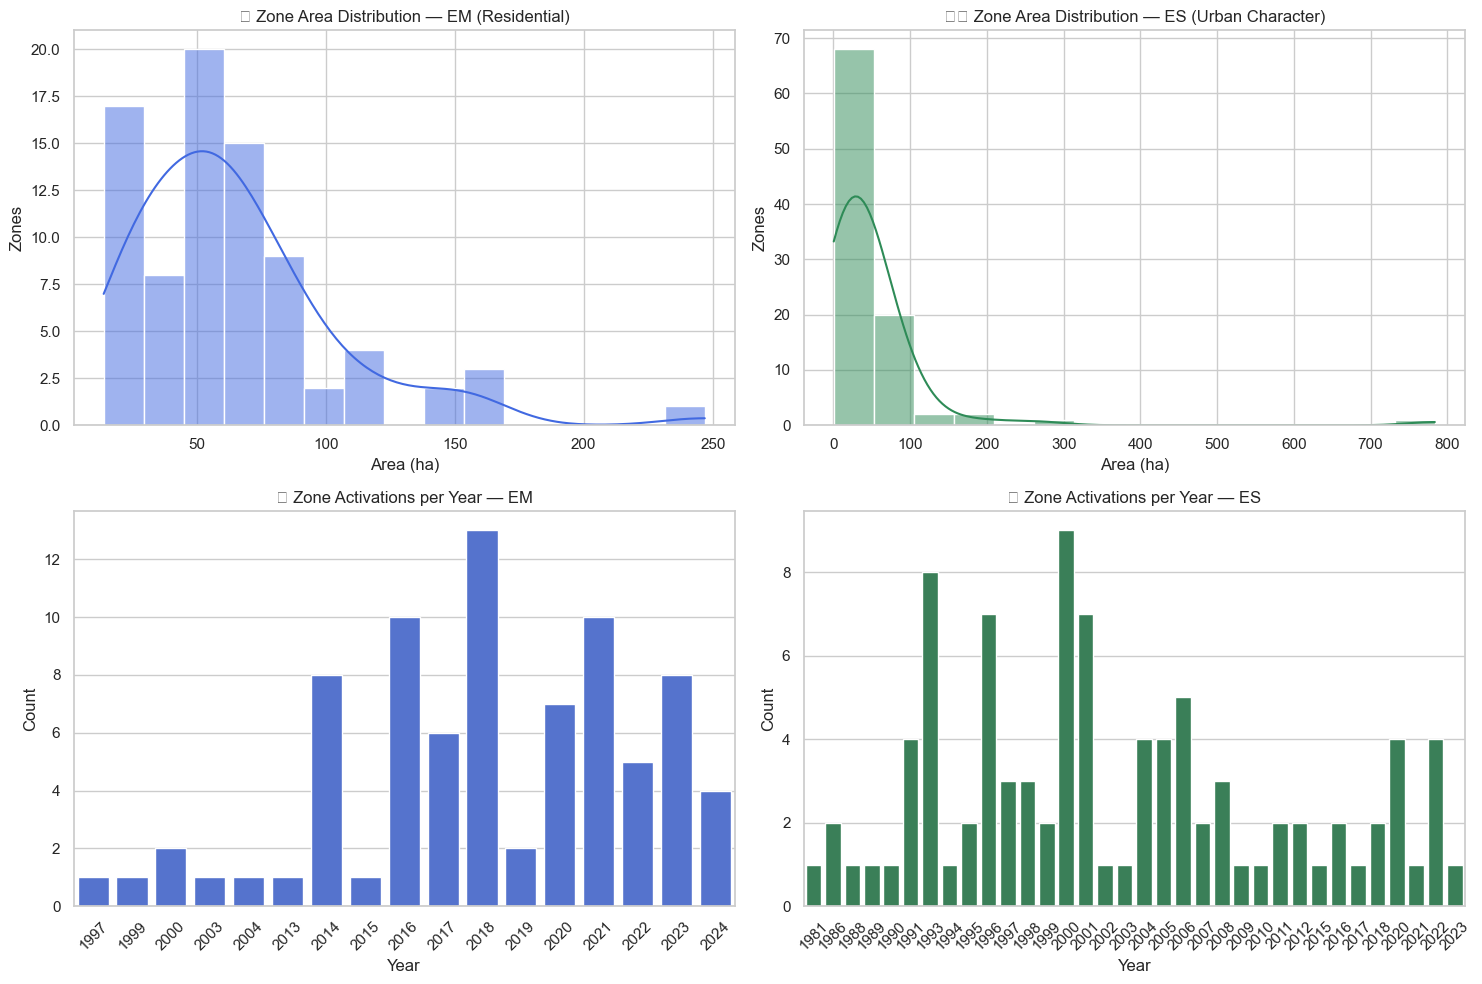

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual theme
sns.set(style="whitegrid", palette="muted")

# Prepare activation years
em_years = gdf_em["f_in_kraft"].dt.year.dropna()
es_years = gdf_es["f_in_kraft"].dt.year.dropna()

# 📊 Set up Seaborn plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histogram: fl_in_ha
sns.histplot(data=gdf_em, x="fl_in_ha", bins=15, kde=True, ax=axs[0, 0], color="royalblue")
axs[0, 0].set_title("🏠 Zone Area Distribution — EM (Residential)")
axs[0, 0].set_xlabel("Area (ha)")
axs[0, 0].set_ylabel("Zones")

sns.histplot(data=gdf_es, x="fl_in_ha", bins=15, kde=True, ax=axs[0, 1], color="seagreen")
axs[0, 1].set_title("🏙️ Zone Area Distribution — ES (Urban Character)")
axs[0, 1].set_xlabel("Area (ha)")
axs[0, 1].set_ylabel("Zones")

# Barplot: Year counts
sns.countplot(x=em_years, ax=axs[1, 0], color="royalblue")
axs[1, 0].set_title("📅 Zone Activations per Year — EM")
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("Count")
axs[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x=es_years, ax=axs[1, 1], color="seagreen")
axs[1, 1].set_title("📅 Zone Activations per Year — ES")
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("Count")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()